# **Heart Failure Analysis**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Data Preparation and Cleaning

In [3]:
import pandas as pd
import numpy as np

path='/content/drive/MyDrive/Colab Notebooks/heart_failure_clinical_records_dataset.csv'
df=pd.read_csv(path)
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


######Let's modify our "heart_failure_df" data frame by dropping unnecessary columns / rows, renaming the column names, changing the data type of column and so on.

In [4]:
## renaming the Death Event as Patient_Dead
df.rename(columns = {'DEATH_EVENT':'patient_dead'}, inplace = True)

## Dropping the time columns which is not neccessary
df.drop(columns=['time'],inplace=True)

In [5]:
## Converting the datatype of age from float to int
df.age=df.age.astype('int')

In [6]:
#changing the data type of following columns to bool type for our convenience 
df[['anaemia','diabetes','high_blood_pressure', 'smoking', 'patient_dead']] = df[['anaemia','diabetes', 'high_blood_pressure', 'smoking', 'patient_dead']].astype(bool)

In [7]:
## Changing the sex to Male and Female
df['sex']=np.where(df['sex']==1,'Male','Female')

In [8]:
## Changing the platelets count to kg-platelets/mcL
df['platelets']=(df['platelets']/1000).astype('int')

In [9]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,patient_dead
0,75,False,582,False,20,True,265,1.9,130,Male,False,True
1,55,False,7861,False,38,False,263,1.1,136,Male,False,True
2,65,False,146,False,20,False,162,1.3,129,Male,True,True
3,50,True,111,False,20,False,210,1.9,137,Male,False,True
4,65,True,160,True,20,False,327,2.7,116,Female,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,False,61,True,38,True,155,1.1,143,Male,True,False
295,55,False,1820,False,38,False,270,1.2,139,Female,False,False
296,45,False,2060,True,60,False,742,0.8,138,Female,False,False
297,45,False,2413,False,38,False,140,1.4,140,Male,True,False


In [10]:
## checking the null values in dataframe
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
patient_dead                0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int64  
 1   anaemia                   299 non-null    bool   
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    bool   
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    bool   
 6   platelets                 299 non-null    int64  
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    object 
 10  smoking                   299 non-null    bool   
 11  patient_dead              299 non-null    bool   
dtypes: bool(5), float64(1), int64(5), object(1)
memory usage: 17.9+ KB


In [12]:
df.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000
mean,60.829431,581.839465,38.083612,263.327759,1.39388,136.625418
std,11.894997,970.287881,11.834841,97.805105,1.03451,4.412477
min,40.000000,23.000000,14.000000,25.000000,0.50000,113.000000
25%,51.000000,116.500000,30.000000,212.500000,0.90000,134.000000
50%,60.000000,250.000000,38.000000,262.000000,1.10000,137.000000
75%,70.000000,582.000000,45.000000,303.500000,1.40000,140.000000
max,95.000000,7861.000000,80.000000,850.000000,9.40000,148.000000


In [13]:
## checking the column names of the dataframe
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'patient_dead'],
      dtype='object')

#####All other numeric value records found okay, but the maximum value of Creatinine Phosphokinase (CPK) measured is 7861, that's too high for a normal person. The maximum value of CKP found in a heart failure patient was around 600 micrograms per liter.
#####The normal value of CPK ranges from 10 to 120 micrograms per liter, but around 36 patients has CPK level more than 1000 micrograms per liter in our observation. Since, we are not sure about the source of error or that the recorded data is correct or not. This error and huge difference in value might be due to the different measurement units. So let's drop that column and not include in our analysis.

In [14]:
#to drop creatinine_phosphokinase column
df.drop(columns=['creatinine_phosphokinase'],inplace=True, axis = 1, errors ='ignore')

In [15]:
df.columns

Index(['age', 'anaemia', 'diabetes', 'ejection_fraction',
       'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium',
       'sex', 'smoking', 'patient_dead'],
      dtype='object')

In [16]:
#to save the html table as pandas data frame 
column_details_df = pd.read_html("https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5/tables/1 ")[0]
column_details_df

,Feature,Explanation,Measurement,Range
0,Age,Age of the patient,Years,"[40,..., 95]"
1,Anaemia,Decrease of red blood cells or hemoglobin,Boolean,"0, 1"
2,High blood pressure,If a patient has hypertension,Boolean,"0, 1"
3,Creatinine phosphokinase,Level of the CPK enzyme in the blood,mcg/L,"[23,..., 7861]"
4,(CPK),NaN,NaN,NaN
5,Diabetes,If the patient has diabetes,Boolean,"0, 1"
6,Ejection fraction,Percentage of blood leaving,Percentage,"[14,..., 80]"
7,NaN,the heart at each contraction,NaN,NaN
8,Sex,Woman or man,Binary,"0, 1"
9,Platelets,Platelets in the blood,kiloplatelets/mL,"[25.01,..., 850.00]"


In [17]:
#to drop the unnecessary column
column_details_df.drop('Range', axis =1,inplace = True, errors='ignore' )
#to drop the unnecessary rows
column_details_df.drop([3,4,7,13], axis = 0, inplace =True, errors ='ignore')
#to rename the column names
column_details_df.columns = ['feature', 'explanation', 'measurement_unit']
column_details_df

,feature,explanation,measurement_unit
0,Age,Age of the patient,Years
1,Anaemia,Decrease of red blood cells or hemoglobin,Boolean
2,High blood pressure,If a patient has hypertension,Boolean
5,Diabetes,If the patient has diabetes,Boolean
6,Ejection fraction,Percentage of blood leaving,Percentage
8,Sex,Woman or man,Binary
9,Platelets,Platelets in the blood,kiloplatelets/mL
10,Serum creatinine,Level of creatinine in the blood,mg/dL
11,Serum sodium,Level of sodium in the blood,mEq/L
12,Smoking,If the patient smokes,Boolean


In [18]:
#to rearrange and rename the rows to match the heart_failure_df 
column_details_df = column_details_df.reindex([0,1,5,6,2,9,10,11,8,12,14])
column_details_df.features=column_details_df.columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
#to set the feature column as index for our convenience 
column_details_df.set_index(['feature'], inplace =True)

In [20]:
column_details_df

,explanation,measurement_unit
feature,,
Age,Age of the patient,Years
Anaemia,Decrease of red blood cells or hemoglobin,Boolean
Diabetes,If the patient has diabetes,Boolean
Ejection fraction,Percentage of blood leaving,Percentage
High blood pressure,If a patient has hypertension,Boolean
Platelets,Platelets in the blood,kiloplatelets/mL
Serum creatinine,Level of creatinine in the blood,mg/dL
Serum sodium,Level of sodium in the blood,mEq/L
Sex,Woman or man,Binary


In [21]:
#to change the details in explanation column
column_details_df.iloc[1,0]='True, if the patient has Anaemia'
column_details_df.iloc[2,0]='True, if the patient has Diabetes'
column_details_df.iloc[3,0]= '% of blood leaving the heart at each contraction'
column_details_df.iloc[4,0]='True, if the patient has High blood pressure'
column_details_df.iloc[5,0]='Amount of platelets in the blood'
column_details_df.iloc[8,0]= 'Male or Female'
column_details_df.iloc[9,0]='True, if the patient smokes'
column_details_df.iloc[10,0]='True, if the patient died during the follow-up period'

In [22]:
column_details_df

,explanation,measurement_unit
feature,,
Age,Age of the patient,Years
Anaemia,"True, if the patient has Anaemia",Boolean
Diabetes,"True, if the patient has Diabetes",Boolean
Ejection fraction,% of blood leaving the heart at each contraction,Percentage
High blood pressure,"True, if the patient has High blood pressure",Boolean
Platelets,Amount of platelets in the blood,kiloplatelets/mL
Serum creatinine,Level of creatinine in the blood,mg/dL
Serum sodium,Level of sodium in the blood,mEq/L
Sex,Male or Female,Binary


In [23]:
#to change the details in measurement unit column
column_details_df.iloc[8,1]='Boolean'
column_details_df.iloc[5,0]='kilo-platelets / mcL (microliter)'
column_details_df.iloc[6,0]='mg/dL (milligrams per deciliter)'
column_details_df.iloc[7,0]='mEq/L (milliequivalents per litre)'


In [24]:
#let's add another column to mention normal values of the attributes 
column_details_df["normal_value"] = ['None', 
                                     'None', 
                                     'None',
                                     '55% - 70%',
                                     'None', 
                                     '150 - 400 kilo-platelets / mcL', 
                                     '0.6 - 1.2 mg/dL', 
                                     '135 - 145 mEq /L', 
                                     'None', 'None', 'None'
                                    ] 

In [25]:
column_details_df

,explanation,measurement_unit,normal_value
feature,,,
Age,Age of the patient,Years,None
Anaemia,"True, if the patient has Anaemia",Boolean,None
Diabetes,"True, if the patient has Diabetes",Boolean,None
Ejection fraction,% of blood leaving the heart at each contraction,Percentage,55% - 70%
High blood pressure,"True, if the patient has High blood pressure",Boolean,None
Platelets,kilo-platelets / mcL (microliter),kiloplatelets/mL,150 - 400 kilo-platelets / mcL
Serum creatinine,mg/dL (milligrams per deciliter),mg/dL,0.6 - 1.2 mg/dL
Serum sodium,mEq/L (milliequivalents per litre),mEq/L,135 - 145 mEq /L
Sex,Male or Female,Boolean,None


## Datasets- Cleaned and Prepared

### Number of Males and Females Patients

In [26]:
df['sex'].value_counts()

Male      194
Female    105
Name: sex, dtype: int64

### Number of Patients with Anaemia

In [27]:
df['anaemia'].value_counts()

False    170
True     129
Name: anaemia, dtype: int64

### Number of Patients with Diabetes

In [28]:
df['diabetes'].value_counts()

False    174
True     125
Name: diabetes, dtype: int64

### Number of Patients with High Blood Pressure

In [29]:
df.columns

Index(['age', 'anaemia', 'diabetes', 'ejection_fraction',
       'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium',
       'sex', 'smoking', 'patient_dead'],
      dtype='object')

In [30]:
df['high_blood_pressure'].value_counts()

False    194
True     105
Name: high_blood_pressure, dtype: int64

### Number of Patients with Smoking Habits

In [31]:
df['smoking'].value_counts()

False    203
True      96
Name: smoking, dtype: int64

### Number of Patients died during Follow up period

In [32]:
df.groupby(['patient_dead', 'sex']).size().reset_index().pivot(columns= 'patient_dead',index = 'sex',values=0)

patient_dead,False,True
sex,,
Female,71,34
Male,132,62


### Number of patients with Abnormal Ejection Fraction

In [33]:
abn_ef=df[(df['ejection_fraction']<55) | (df['ejection_fraction']>70)]
len(abn_ef)

261

The normal value of Ejection Fraction ranges from 55% to 70%. Here, we found that there are 261 patients with abnormal Ejection Fraction.

### Number of patients with abnormal platelets count

In [34]:
# to find normal value of platelets count
column_details_df.loc['Platelets','normal_value']

'150 - 400 kilo-platelets / mcL'

In [35]:
abn_pc=df[(df['platelets']<150) | (df['platelets']>400)]
len(abn_pc)

47

The normal value of Platelets Count ranges from 150 - 400 kilo-platelets / mcL. Here, we found that there are 47 patients with abnormal Platelets Count

### Number of Patients with Abnormal Creatinine level in the blood

In [36]:
# to find normal value of creatinine level
column_details_df.loc['Serum creatinine','normal_value']

'0.6 - 1.2 mg/dL'

In [37]:
abn_cl=df[(df['serum_creatinine']<0.6) | (df['serum_creatinine']>1.2)]
len(abn_cl)

102

The normal value of Serum creatinine ranges from 0.6 - 1.2 mg/dL. Here, we found that there are 102 patients with abnormal Creatinine level in the blood.

### Number of Patients with Abnormal Sodium level in the blood

In [38]:
# to find normal value of sodium level
column_details_df.loc['Serum sodium','normal_value']

'135 - 145 mEq /L'

In [39]:
abn_sl=df[(df['serum_sodium']<135) | (df['serum_sodium']>145)]
len(abn_sl)

85

The normal value of Sodium level in the blood ranges from 135 - 145 mEq/L. Here, we found that there are 85 patients with abnormal Sodium level in the blood.

#**Exploratory Data Analysis and Visualization**

Let's install and import "seaborn" library as "sns" and "matplotlib.pyplot" module as "plt" to perform some visualization operations on our data frame to understand the distribution and relationships of attributes

In [41]:
#import seaborn and matplotlib.pyplot 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline 
#set some default style for our graphs
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = 'white'

##Age
Let's have a look at the distribution of age of the heart failure patients recorded in our dataset by using "hist" function from "matplotlib.pyplot" which is used to create histograms.

Text(0.5, 1.0, 'Distribution of Age')

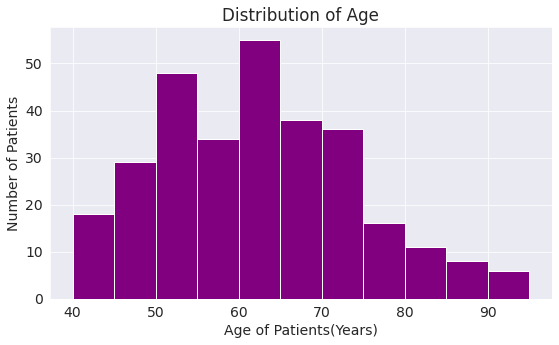

In [47]:
plt.hist(df.age,bins=np.arange(40,100,5),color='purple')
plt.xlabel("Age of Patients(Years)")
plt.ylabel("Number of Patients")
plt.title("Distribution of Age")

From the above histogram, it's clear that most of the patients falls under 60-65 age group and the next place goes to 50-55 age group

## Gender

In [48]:
gender_count=df['sex'].value_counts()

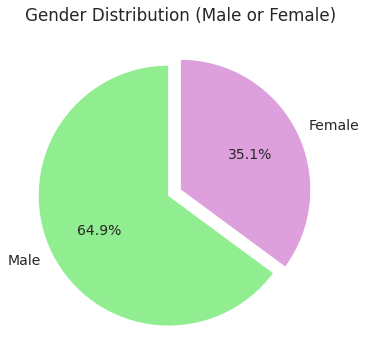

In [49]:
plt.figure(figsize=(12, 6))
plt.pie(gender_count, labels = gender_count.index, autopct ='%.1f%%', startangle = 90, explode = [0.1, 0], colors = ['lightgreen', 'plum'])
plt.title("Gender Distribution (Male or Female)");

## Death

In [51]:
#count number of patients dead
dead_counts = df.patient_dead.value_counts()
dead_counts

False    203
True      96
Name: patient_dead, dtype: int64

Text(0.5, 1.0, '% of Patients Dead & Alive')

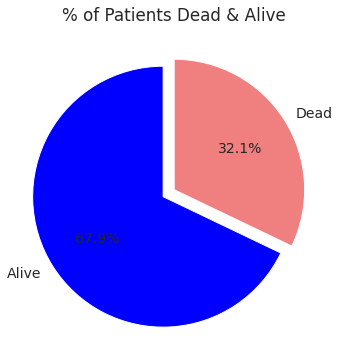

In [52]:
plt.figure(figsize=(12, 6))
plt.pie(dead_counts, labels = ['Alive', 'Dead'] , autopct ='%.1f%%', startangle = 90, explode=[0.1, 0], colors =['blue', 'lightcoral'])
plt.title("% of Patients Dead & Alive")

## Death and Gender

Text(0, 0.5, 'Number of Patients')

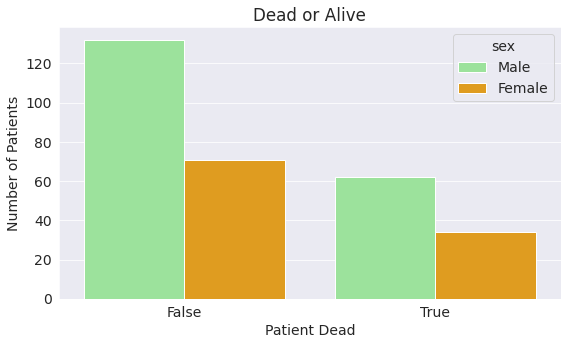

In [53]:
sns.countplot(x=df.patient_dead,hue=df.sex,palette=['lightgreen','orange'])
plt.title('Dead or Alive')
plt.xlabel('Patient Dead')
plt.ylabel('Number of Patients')

## Diseases

In [54]:
#create columns to indicate abnormalities 
df['abnormal_ef'] = np.where(((df.ejection_fraction >= 55) & (df.ejection_fraction <=70)) , 'Normal', 'Abormal')
df['abnormal_platelets'] = np.where(((df.platelets >= 150) & (df.platelets <= 400)) , 'Normal', 'Abnormal')
df['abnormal_creatinine'] = np.where(((df.serum_creatinine >= 0.6) & (df.serum_creatinine <= 1.2)), 'Normal','Abnormal')
df['abnormal_sodium'] = np.where(((df.serum_sodium >= 135) & (df.serum_sodium <= 145)) , 'Normal', 'Abnormal')

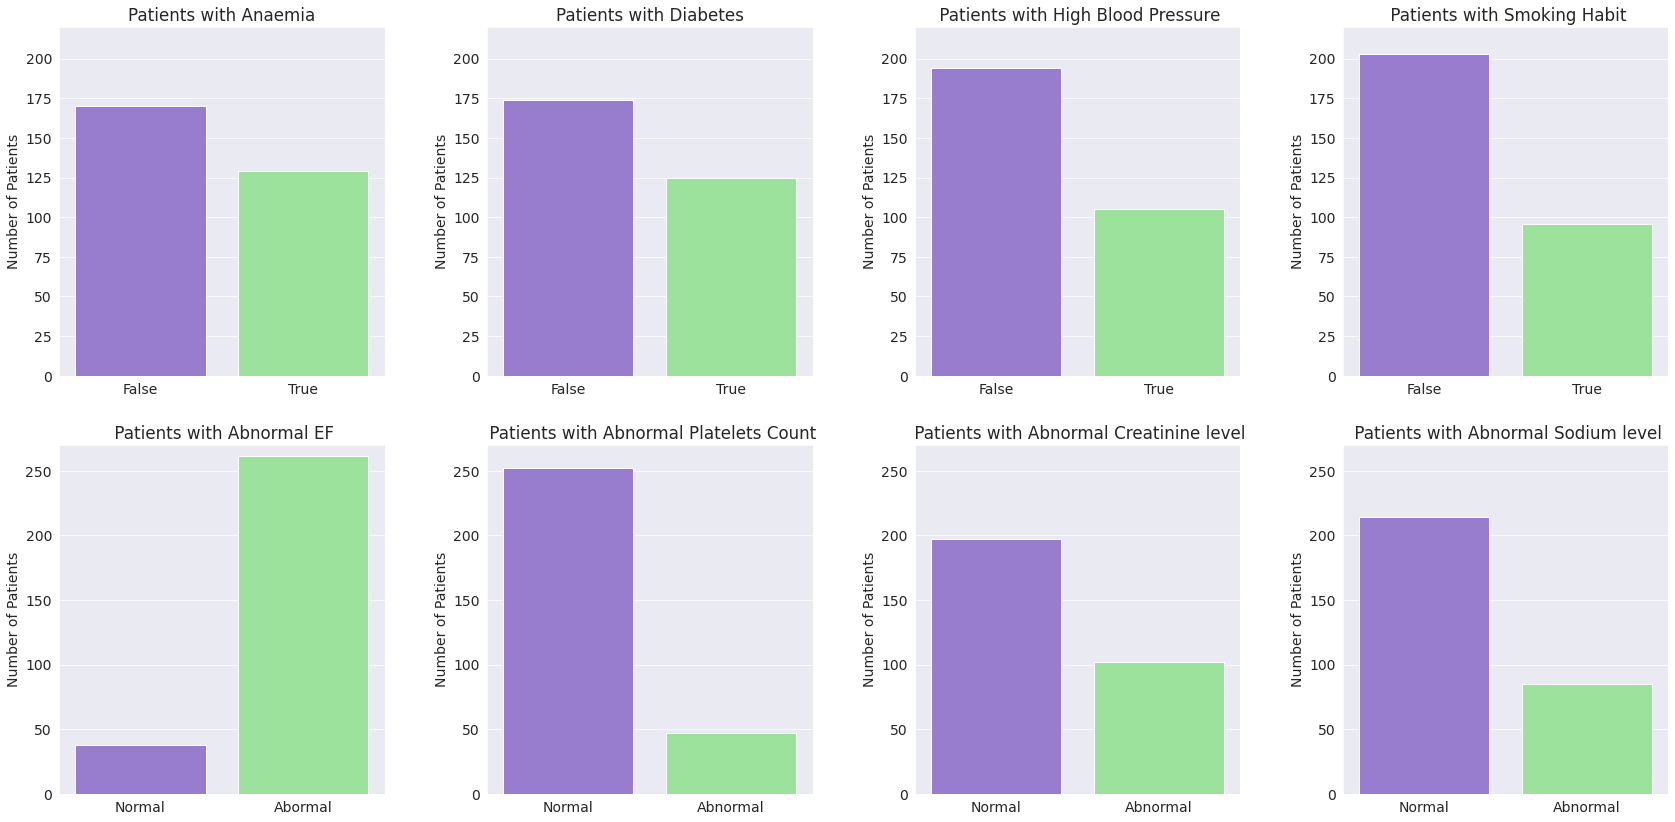

In [55]:
fig, axis = plt.subplots(2,4, figsize =(24, 12))
#axis(0,0) use this axis for Anaemia
axis[0,0].set_title("Patients with Anaemia")
sns.countplot(x=df.anaemia, ax=axis[0,0],palette=['mediumpurple','lightgreen'])
axis[0,0].set_xlabel("")
axis[0,0].set_ylabel("Number of Patients")
axis[0,0].set_ylim([0, 220])

#axis(0,1) use this for diabetes
axis[0,1].set_title("Patients with Diabetes")
sns.countplot(x=df.diabetes,ax=axis[0,1],palette=['mediumpurple','lightgreen'])
axis[0,1].set_xlabel("")
axis[0,1].set_ylabel("Number of Patients")
axis[0,1].set_ylim([0,220])

#axis(0,2) use this axis for High blood pressure 
axis[0,2].set_title(" Patients with High Blood Pressure")
sns.countplot(x = df.high_blood_pressure, ax=axis[0,2], palette=['mediumpurple','lightgreen'])
axis[0,2].set_xlabel("")
axis[0,2].set_ylabel("Number of Patients")
axis[0,2].set_ylim([0, 220])

#axis(0,3) use this axis for smoking habit 
axis[0,3].set_title(" Patients with Smoking Habit")
sns.countplot(x = df.smoking, ax=axis[0,3], palette=['mediumpurple','lightgreen'])
axis[0,3].set_xlabel("")
axis[0,3].set_ylabel("Number of Patients")
axis[0,3].set_ylim([0, 220])


#axis(1,0) use this axis for Ejection Fraction 
axis[1,0].set_title(" Patients with Abnormal EF")
sns.countplot(x = df.abnormal_ef.sort_values(ascending =False) , ax=axis[1,0], palette=['mediumpurple','lightgreen'])
axis[1,0].set_xlabel("")
axis[1,0].set_ylabel("Number of Patients")
axis[1,0].set_ylim([0, 270])

#axis(1,1) use this axis for Platelets count 
axis[1,1].set_title(" Patients with Abnormal Platelets Count")
sns.countplot(x = df.abnormal_platelets.sort_values(ascending =False) , ax=axis[1,1], palette=['mediumpurple','lightgreen'])
axis[1,1].set_xlabel("")
axis[1,1].set_ylabel("Number of Patients")
axis[1,1].set_ylim([0, 270])

#axis(1,2) use this axis for Creatinine level 
axis[1,2].set_title(" Patients with Abnormal Creatinine level")
sns.countplot(x = df.abnormal_creatinine.sort_values(ascending =False), ax=axis[1,2], palette=['mediumpurple','lightgreen'])
axis[1,2].set_xlabel("")
axis[1,2].set_ylabel("Number of Patients")
axis[1,2].set_ylim([0, 270])

#axis(1,3) use this axis for sodium level
axis[1,3].set_title(" Patients with Abnormal Sodium level")
sns.countplot(x = df.abnormal_sodium.sort_values(ascending =False), ax=axis[1,3], palette=['mediumpurple','lightgreen'])
axis[1,3].set_xlabel("")
axis[1,3].set_ylabel("Number of Patients")
axis[1,3].set_ylim([0, 270])

#to provide spacing between adjacent plots
plt.tight_layout(pad=2);

As we can clearly identify, that abnormality in Ejection Fraction(EF) is the most common factor among the heart failure patients.
Low EF is one of the primary reasons which causes heart failure, that's the reason we have more number of patients with abnormal Ejection Fraction.

## Pair wise relationship

In [56]:
#filter columns with numeric value
numeric_column = df[['age', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']]

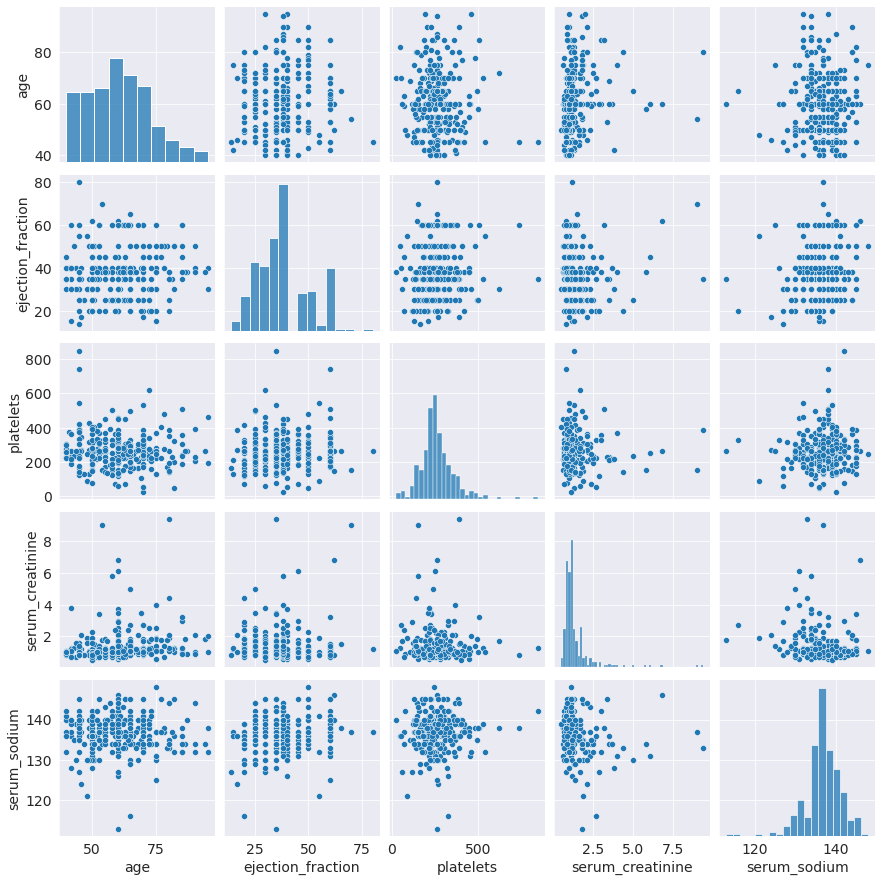

In [57]:
sns.pairplot(numeric_column);

## Attributes- Distribution

Distribution plot helps us to find whether the variables are normally distributed or skewed.

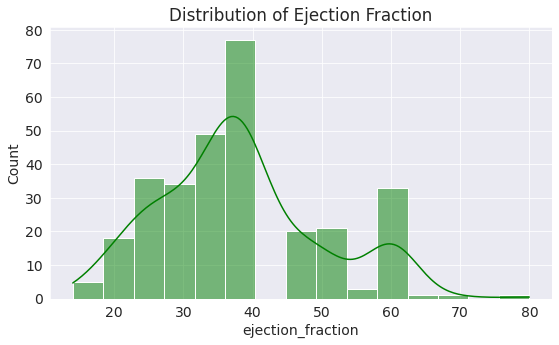

In [58]:
plt.title("Distribution of Ejection Fraction")
sns.histplot(df.ejection_fraction, kde = True, color ='green');

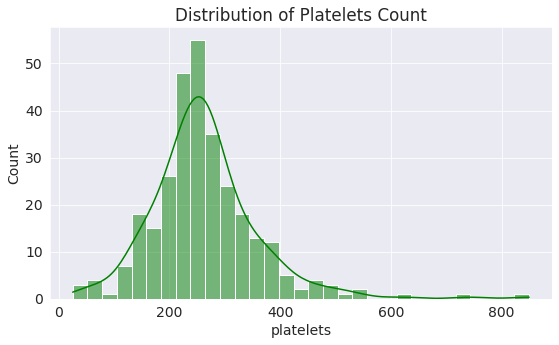

In [60]:
plt.title("Distribution of Platelets Count")
sns.histplot(df.platelets, kde = True, color ='green');

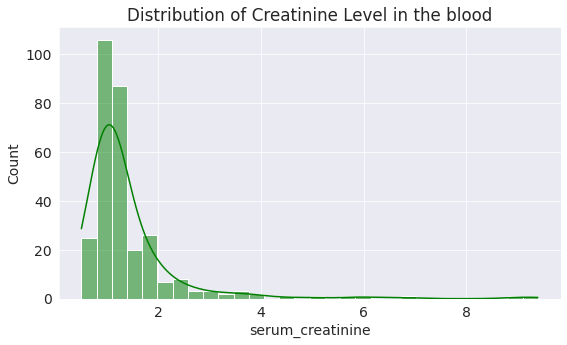

In [61]:
plt.title("Distribution of Creatinine Level in the blood") 
sns.histplot(df.serum_creatinine, kde = True, bins = 30, color ='green')

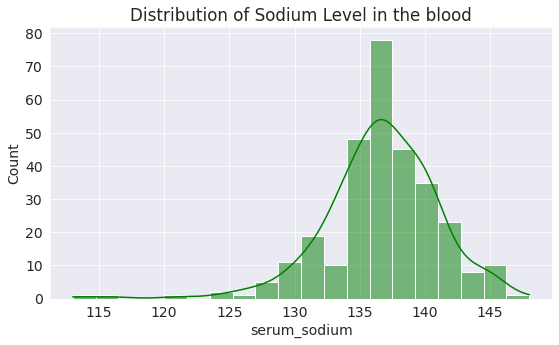

In [62]:
plt.title("Distribution of Sodium Level in the blood") 
sns.histplot(df.serum_sodium, kde = True, color ='green')

Platelets count, Ejection Fraction and Creatinine Level are right skewed and Sodium Level is left skewed. 

# **Exploration**

Q: How many number of patients are there in our observation? out of them how many male and female patients are there?


In [65]:
df.shape

(299, 15)

In [67]:
print("Total number of patients in our observation is {}.".format(df.shape[0]))

Total number of patients in our observation is 299.


In [66]:
df['sex'].value_counts()

Male      194
Female    105
Name: sex, dtype: int64

In [69]:
print("Total number of Male patients are",df['sex'].value_counts()[0])
print("Total number of Female patients are",df['sex'].value_counts()[1])

Total number of Male patients are 194
Total number of Female patients are 105


Q: What is the normal level of Ejection Fraction? How many patients had abnormal Ejection Fraction?

In [74]:
print("Normal level of Ejection Fraction is",column_details_df.loc['Ejection fraction','normal_value'])

Normal level of Ejection Fraction is 55% - 70%


In [79]:
print("Number of patients with abnormal Ejection fraction are",df['abnormal_ef'].value_counts()[0])

Number of patients with abnormal Ejection fraction are 261


Q: What is the normal level of Platelets Count? How many patients had abnormal Platelets Count?

In [81]:
print("Normal level of Platelets Count is",column_details_df.loc['Platelets','normal_value'])

Normal level of Platelets Count is 150 - 400 kilo-platelets / mcL


In [84]:
print("Number of patients with abnormal Platelets Count are",df['abnormal_platelets'].value_counts()[0])

Number of patients with abnormal Platelets Count are 252


Q: What is the normal level of Creatinine in the blood? How many patients had abnormal Creatinine level?

In [86]:
print("Normal level of Serum Creatinine is",column_details_df.loc['Serum creatinine','normal_value'])

Normal level of Serum Creatinine is 0.6 - 1.2 mg/dL


In [88]:
print("Number of patients with abnormal Creatinine are",df['abnormal_creatinine'].value_counts()[0])

Number of patients with abnormal Creatinine are 197


Q: What is the normal level of Sodium in the blood? How many patients had abnormal Sodium level?

In [94]:
print("Normal level of Serum Sodium is",column_details_df.loc['Serum sodium','normal_value'])

Normal level of Serum Sodium is 135 - 145 mEq /L


In [93]:
print("Number of patients with abnormal Sodium are",df['abnormal_sodium'].value_counts()[0])

Number of patients with abnormal Sodium are 214


Q: How many patients had smoking habit? out of them how many male and female patients are there?

In [98]:
print("Number of Patients with smoking habit are",df['smoking'].value_counts()[1])

Number of Patients with smoking habit are 96


In [105]:
print("Number of Male smoking patients are",df[(df['smoking']==True) & (df["sex"]=='Male')].shape[0])
print("Number of Female smoking patients are",df[(df['smoking']==True) & (df["sex"]=='Female')].shape[0])

Number of Male smoking patients are 92
Number of Female smoking patients are 4


Q: How many patients had anaemia or diabetes or high blood pressure?

In [109]:
anaemia_patients = df[df.anaemia == True].shape[0]
diabetes_patients = df[df.diabetes == True].shape[0]
high_bp_patients = df[df.high_blood_pressure == True].shape[0]

In [110]:
print("Number of Patients with Anaemia is {}.".format(anaemia_patients))
print("Number of Patients with Diabetes is {}.".format(diabetes_patients))
print("Number of Patients with High Blood Pressure is {}.".format(high_bp_patients))

Number of Patients with Anaemia is 129.
Number of Patients with Diabetes is 125.
Number of Patients with High Blood Pressure is 105.


Q: How many patients had both (anaemia & diabetes) or (anaemia & high blood pressure) or (diabetes & high blood pressure)? And how many patients had all three?

In [112]:
print("Number of Patients with Anaemia and Diabetes is",df[(df['anaemia']==True) & (df['diabetes']==True)].shape[0])
print("Number of Patients with Anaemia and High Blood Pressure is",df[(df['anaemia']==True) & (df['high_blood_pressure']==True)].shape[0])
print("Number of Patients with Diabetes and High Blood Pressure is",df[(df['high_blood_pressure']==True) & (df['diabetes']==True)].shape[0])

Number of Patients with Anaemia and Diabetes is 53
Number of Patients with Anaemia and High Blood Pressure is 48
Number of Patients with Diabetes and High Blood Pressure is 43


In [113]:
print("Number of Patients with Anaemia and Diabetes and High blood pressure is",df[(df['anaemia']==True) & (df['diabetes']==True) & (df['high_blood_pressure']==True)].shape[0])

Number of Patients with Anaemia and Diabetes and High blood pressure is 17


Q: How many patients died during the follow-up period? out of them how many male and female patients are there?

In [118]:
print("Number of patients died during the follow up period is",df['patient_dead'].value_counts()[1])

Number of patients died during the follow up period is 96


In [120]:
print("Number of male patients died during the follow up period is",df[(df['patient_dead']==True) & (df['sex']=='Male')].shape[0])
print("Number of female patients died during the follow up period is",df[(df['patient_dead']==True) & (df['sex']=='Female')].shape[0])

Number of male patients died during the follow up period is 62
Number of female patients died during the follow up period is 34


Q: Which disease / abnormality is most common and least common among the heart failure patients?

In [121]:
dict = ({df.columns[3]:abn_ef.shape[0]} , {df.columns[5]:abn_pc.shape[0]} , {df.columns[6]:abn_cl.shape[0]}, {df.columns[7]: abn_sl.shape[0]} , {df.columns[1]:anaemia_patients} , {df.columns[2]:diabetes_patients} , {df.columns[4]:high_bp_patients})
print (dict)
print (max(abn_ef.shape[0], abn_pc.shape[0], abn_cl.shape[0], abn_sl.shape[0], anaemia_patients , diabetes_patients , high_bp_patients )) 
print (min(abn_ef.shape[0], abn_pc.shape[0], abn_cl.shape[0], abn_sl.shape[0], anaemia_patients , diabetes_patients , high_bp_patients )) 

({'ejection_fraction': 261}, {'platelets': 47}, {'serum_creatinine': 102}, {'serum_sodium': 85}, {'anaemia': 129}, {'diabetes': 125}, {'high_blood_pressure': 105})
261
47


In [122]:
print("The most common abnormality or disease among the heart failure patients is Ejection Fraction and 261 Patients had abnormal Ejection Fraction.")

The most common abnormality or disease among the heart failure patients is Ejection Fraction and 261 Patients had abnormal Ejection Fraction.


In [123]:
print("The least common abnormality or disease among the heart failure patients is Abnormal Platelets Count and 47 Patients had abnormal Platelets Count.")

The least common abnormality or disease among the heart failure patients is Abnormal Platelets Count and 47 Patients had abnormal Platelets Count.


Q: Does smoking habit affects the life of a heart failure patient?

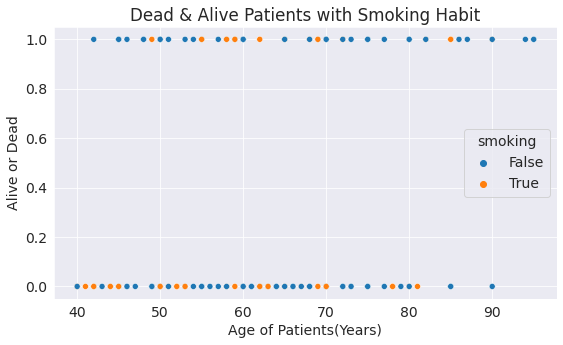

In [125]:
plt.title('Dead & Alive Patients with Smoking Habit')
plt.xlabel('Age of Patients(Years)')
plt.ylabel('Alive or Dead')
sns.scatterplot(x = 'age', y = 'patient_dead', hue = 'smoking', data = df)

From the above result, we can conclude that the number of patients with smoking habit died during follow-up period is less when compared to alive patients with smoking habit. It indicates that smoking habit has very less impact on the life of a heart failure patient.